# MNIST 손글씨 - CNN v1
- 2 x conv2D layers
- 1 FCN layer
- l output layer

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [13]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

- 데이터 전처리

In [14]:
# X_train, X_test 정규화(0~1), 이미지 차원 변경

X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [15]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

 - 모델 정의 / 설정/ 학습 / 평가

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [17]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 36864)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               18874880  
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [19]:
model_path = 'best_mnist_cnn_v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [20]:
hist1 = model.fit(X_train, Y_train, validation_split=0.2,
          epochs=10000, batch_size=200,
          callbacks = [mc,es])

Epoch 1/10000
238/240 [============================>.] - ETA: 0s - loss: 0.1528 - accuracy: 0.9530
Epoch 1: val_loss improved from inf to 0.05601, saving model to best_mnist_cnn_v1.h5
240/240 [==============================] - 7s 26ms/step - loss: 0.1520 - accuracy: 0.9532 - val_loss: 0.0560 - val_accuracy: 0.9836
Epoch 2/10000
240/240 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9891
Epoch 2: val_loss improved from 0.05601 to 0.05528, saving model to best_mnist_cnn_v1.h5
240/240 [==============================] - 6s 26ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0553 - val_accuracy: 0.9847
Epoch 3/10000
238/240 [============================>.] - ETA: 0s - loss: 0.0177 - accuracy: 0.9945
Epoch 3: val_loss improved from 0.05528 to 0.04583, saving model to best_mnist_cnn_v1.h5
240/240 [==============================] - 5s 22ms/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.0458 - val_accuracy: 0.9867
Epoch 4/10000
238/240 [=====================

In [21]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0552 - accuracy: 0.9872


[0.05524921789765358, 0.9872000217437744]

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 36864)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               18874880  
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [23]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)

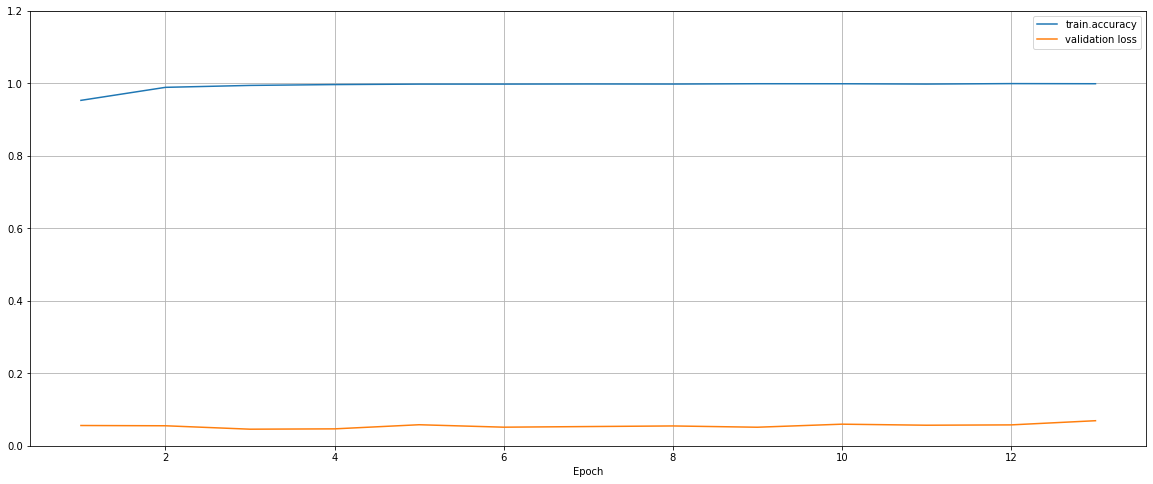

In [24]:
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()